# Statistical Thinking in Python (Part 1)

## Graphical exploratory data analysis


In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.data.shape

(150, 4)

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X = data.data[:, 2]
X

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [6]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(X, columns=["petal_length"])
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)
df.head()

,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


In [10]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

```python
>>> data = np.c_[X, df.species]
>>> data[:5]
array([[1.4, 'setosa'],
       [1.4, 'setosa'],
       [1.3, 'setosa'],
       [1.5, 'setosa'],
       [1.4, 'setosa']], dtype=object)
```
<br>


In [11]:
versico = df.query('species == "versicolor"')
versico.head()

,petal_length,species
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor


In [12]:
versico.petal_length.values.astype('double');

>Recall that to specify the default seaborn style, you can use `sns.set()`

>J. assigned his plotting statements (except for plt.show()) to the `dummy variable _`. This is to prevent unnecessary output from being displayed. 

> Alternatively, in Jupyter notebook, you could use a `;` after your plotting statements to achieve the same effect.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versico.petal_length.values.astype('double'))

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

### Adjusting the number of bins in a histogram

>The `"square root rule"` is a commonly-used rule of thumb for `choosing number of bins`: choose the number of bins to be the square root of the number of samples.

In [14]:
versicolor_petal_length  = versico.petal_length.values.astype('double')

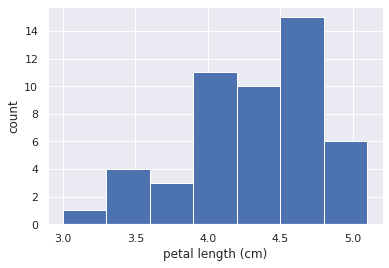

In [15]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

>... a major drawback of using histograms is that the `same dataset can look different depending on how the bins are chosen` and in many cases choice of bins is arbitrary. This leads to `binning bias`.

>... another problem with histograms is that we are `not ploting all of the data`, we are swipping the data into bins and loosing its actual values, 

### Bee swarm plot

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


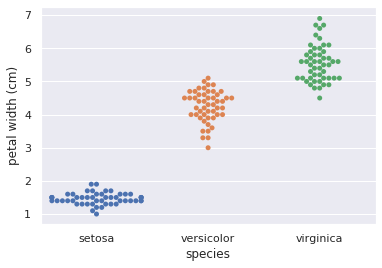

In [17]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal width (cm)')

### Interpreting a bee swarm plot

Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely.

### Computing the ECDF

Empirical cumulative distribution function (ECDF) 

>The ECDF essentially allows you to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set.  

>`y axis is the ACCUMULATED PROBABILITY of x`  
>`y axis` show the percentage of the dataset whos values are less than equal to the `x axis` values.  
>`x axis` shows the sorted values of the dataset being analized.  

>**Note Aside**: We obtain a visual distribution of the `probability of x` using an `normed histogram`.

Resource: [J.D. data blog](https://www.jddata22.com/home//plotting-an-empirical-cdf-in-python)

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

### Plotting the ECDF 

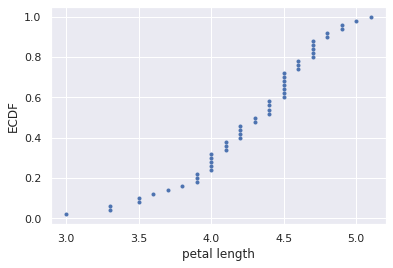

In [52]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle='none')

# Label the axes
_ = plt.xlabel('petal length')
_ = plt.ylabel('ECDF')

In [24]:
x_vers

array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
       4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

In [25]:
y_vers

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

### Comparison of ECDFs

In [26]:
setosa_petal_length = df.query('species == "setosa"')['petal length (cm)'].values.astype('double')
virginica_petal_length = df.query('species == "virginica"')['petal length (cm)'].values.astype('double')

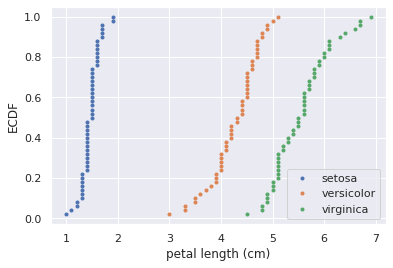

In [27]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

## Quantitative exploratory data analysis


>An outlier can significantly affect the value of the mean, but not the median.

### Computing means

In [28]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Computing percentiles

In [29]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25.,  50.,  75.,  97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

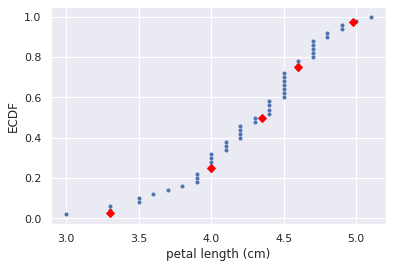

In [30]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',linestyle='none')

In [31]:
percentiles/100

array([0.025, 0.25 , 0.5  , 0.75 , 0.975])

### Box-and-whisker plot

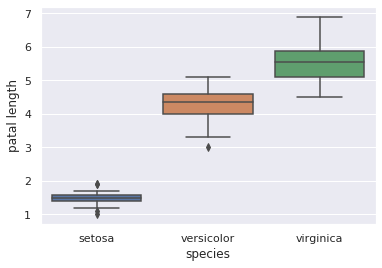

In [32]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.xlabel('species')
plt.ylabel('patal length');

### Computing the variance

In [33]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.21640000000000004 0.21640000000000004


### The standard deviation and the variance

The standard deviation is the square root of the variance.

>It is a messure of how spread is the data.

In [34]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.square(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.04682896000000002
0.4651881339845203


### Scatter plots

The largest spread corresponds to the largest variance.

In [35]:
versicolor_petal_width = df.query('species == "versicolor"')['petal width (cm)'].values.astype('double')

Text(0, 0.5, 'petal width')

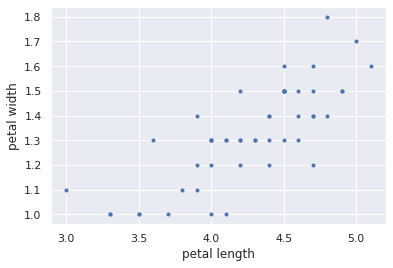

In [36]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal length')
plt.ylabel('petal width')

### Computing the covariance

>It's a messure of how two features vary *together*

>*covariance_matrix*: This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

>Note that by symmetry, entry [1,0] is the same as entry [0,1].

<img src="images/covariance.png" width="400">

In [37]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient 

>It is an adimentional quantity that describe similar as the covariance.

<img src="images/pearson-coeficient.png" width="400">

In [38]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Thinking probabilistically-- Discrete variables

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions. Probabilistic language is in fact very precise. It precisely describes uncertainty.

>To draw probabilistic conclusions about what we might expect if we collected the same data again.  
>To draw actionable conclusions from data.  
>To draw more general conclusions from relatively few data or observations.  

We use probabilistic language in statistical inference because..
>Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.  
>Probability provides a measure of uncertainty.

## Hacker statistics

1. Determine how to simulate data
2. Simulate many many times
3. Probability is approximately fraction of trials with the outcome of interest

>
In this exercise,  we'll generate lots of random numbers between zero and one, and then plot a histogram of the results.  
`If the numbers are truly random, all bars in the histogram should be of (close to) equal height.`
>
Generating 4 random numbers by passing the keyword argument size=4 to np.random.random(). Such an approach is more efficient than a for loop...

(array([10024.,  9990., 10041.,  9930.,  9949., 10061., 10116.,  9984.,
        10079.,  9826.]),
 array([5.53667574e-06, 1.00004187e-01, 2.00002838e-01, 3.00001488e-01,
        4.00000139e-01, 4.99998789e-01, 5.99997440e-01, 6.99996091e-01,
        7.99994741e-01, 8.99993392e-01, 9.99992042e-01]),
 <a list of 10 Patch objects>)

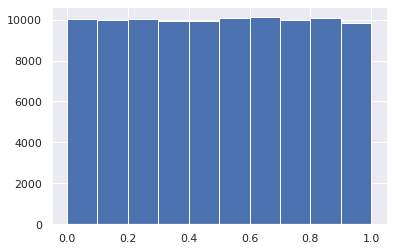

In [39]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

### The np.random module and Bernoulli trials

>Experiment whos output has two options: `success (true)` or `failure (false)`

In [40]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

### How many defaults might we expect?

>did the loan recipient default?  

>plt.hist `normed=True` keyword argument so that the height of the bars of the histogram `indicate the probability`.

>The `normed kwarg is deprecated`, and has been replaced by the `density kwarg`.

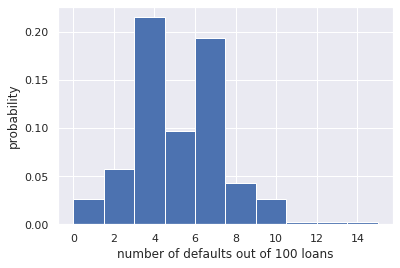

In [42]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

>This is actually not an optimal way to plot a histogram when the results are known to be integers.

In [43]:
n_defaults[:10]
# 6 times success, 5 times success, and so on.

array([6., 5., 7., 8., 5., 5., 3., 2., 7., 6.])

### Will the bank fail?
```
If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?
```

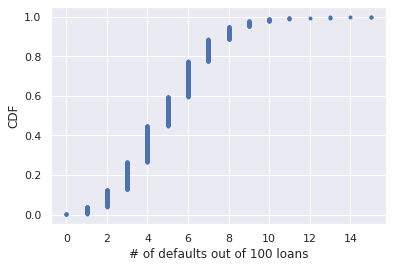

Probability of losing money = 0.022


In [51]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)
# Plot the ECDF with labeled axes

plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('# of defaults out of 100 loans')
plt.ylabel("CDF")

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

```
We most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.
```

### Sampling out of the Binomial distribution

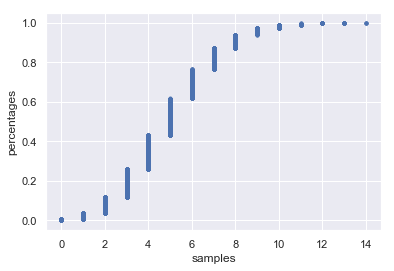

In [97]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('samples')
plt.ylabel('percentages')

# Show the plot
plt.show()


In [145]:
np.random.binomial(n=100, p=0.05) 
# flip a coin 100 times with 0.05 prob

8

### Plotting the Binomial PMF

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


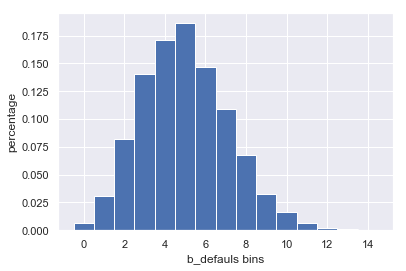

In [146]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, bins=bins, normed=True)

# Label axes
plt.xlabel('b_defauls bins')
plt.ylabel('percentage')

# Show the plot
plt.show()

In [148]:
bins

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5])

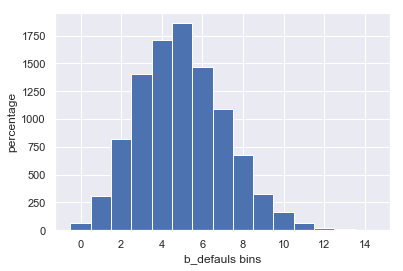

In [147]:
# Generate histogram
plt.hist(n_defaults, bins=bins)

# Label axes
plt.xlabel('b_defauls bins')
plt.ylabel('percentage')

# Show the plot
plt.show()

### Relationship between Binomial and Poisson distributions

In [149]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20,100, 1000]
p = [.5, .1, .01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0143 3.17100859507
n = 20 Binom: 10.0589 2.23679028744
n = 100 Binom: 10.0468 2.99316049687
n = 1000 Binom: 10.0121 3.14011999611


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

### How many no-hitters in a season?

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Both Binomial and Poisson, though Poisson is easier to model and compute.


When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

### Was 2015 anomalous?

In [150]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0071


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

## Thinking probabilistically-- Continuous variables


Remember, that if the value of the CDF is 0.75 at x = 10, then the probability that x is less than 10 is 0.75

The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.

### The Normal PDF

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


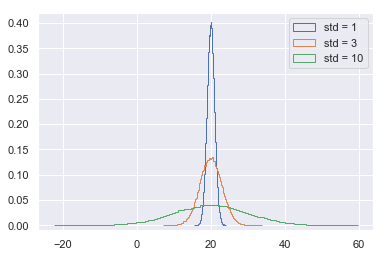

In [151]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, bins=100, normed=True, histtype='step')
plt.hist(samples_std3, bins=100, normed=True, histtype='step')
plt.hist(samples_std10,  bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


You can see how the different standard deviations result in PDFS of different widths. The peaks are all centered at the mean of 20.

### The Normal CDF

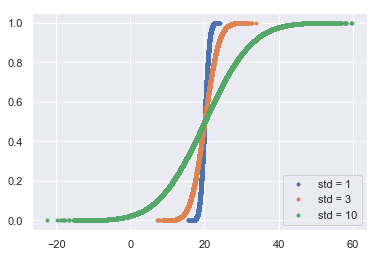

In [152]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10,  marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard 

### Gauss and the 10 Deutschmark banknote

What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote?

mean =3, std= 1


### Are the Belmont Stakes results Normally distributed?

In [153]:
df = pd.read_csv('belmont.csv')
df.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5


In [157]:
df.drop(df[df.Year == 1970].index, inplace=True)

In [158]:
df.drop(df[df.Year == 1973].index, inplace=True)

In [161]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

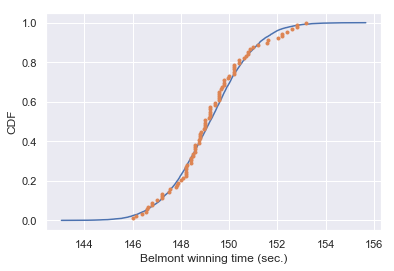

In [162]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data

x_theor, y_theor =  ecdf(samples)
x,y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

### What are the chances of a horse matching or beating Secretariat's record?

In [163]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds (Secretariat's time): prob
prob = (samples <= 144).mean()

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000599


Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

### If you have a story, you can simulate it!

In [164]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

### Distribution of no-hitters and cycles

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Poisson')

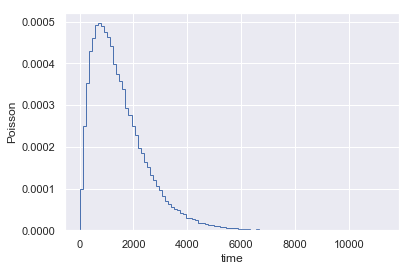

In [169]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Label axes
plt.xlabel('time')
plt.ylabel('Poisson')

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

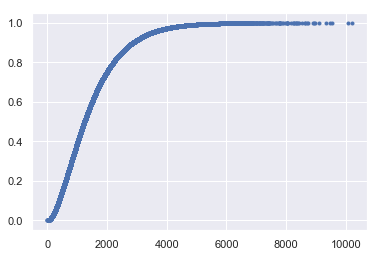

In [168]:
x,y = ecdf(waiting_times)

plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('time')
plt.ylabel('CDF')